In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9d0f6e60819f9a5a.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9ccf708985967f09.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9ccbc2c5d1aaf078.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9bdcc23296db1516.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9cb97f87870407f0.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9bf9cca507923334.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9c077ad23a231abb.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9d6a6499354e3197.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9c3f1c10ba54ed56.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9d6acb154f9932c8.jpg
/kaggle/in

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-07-10 18:10:39.485727: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-10 18:10:39.485865: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-10 18:10:39.629675: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
train_normalize = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_normalize = ImageDataGenerator(rescale=1./255)
val_normalize = ImageDataGenerator(rescale=1./255)

In [5]:
train_set = train_normalize.flow_from_directory(directory="/kaggle/input/plant-disease-recognition-dataset/Train/Train",target_size=(225,225),class_mode='categorical')
val_set = val_normalize.flow_from_directory(directory="/kaggle/input/plant-disease-recognition-dataset/Validation/Validation",target_size=(225,225),class_mode="categorical")
test_set = test_normalize.flow_from_directory(directory="/kaggle/input/plant-disease-recognition-dataset/Test/Test",target_size=(225,225),class_mode="categorical")

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Flatten,Dense,MaxPooling2D,Conv2D,Dropout

In [7]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=(225,225,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


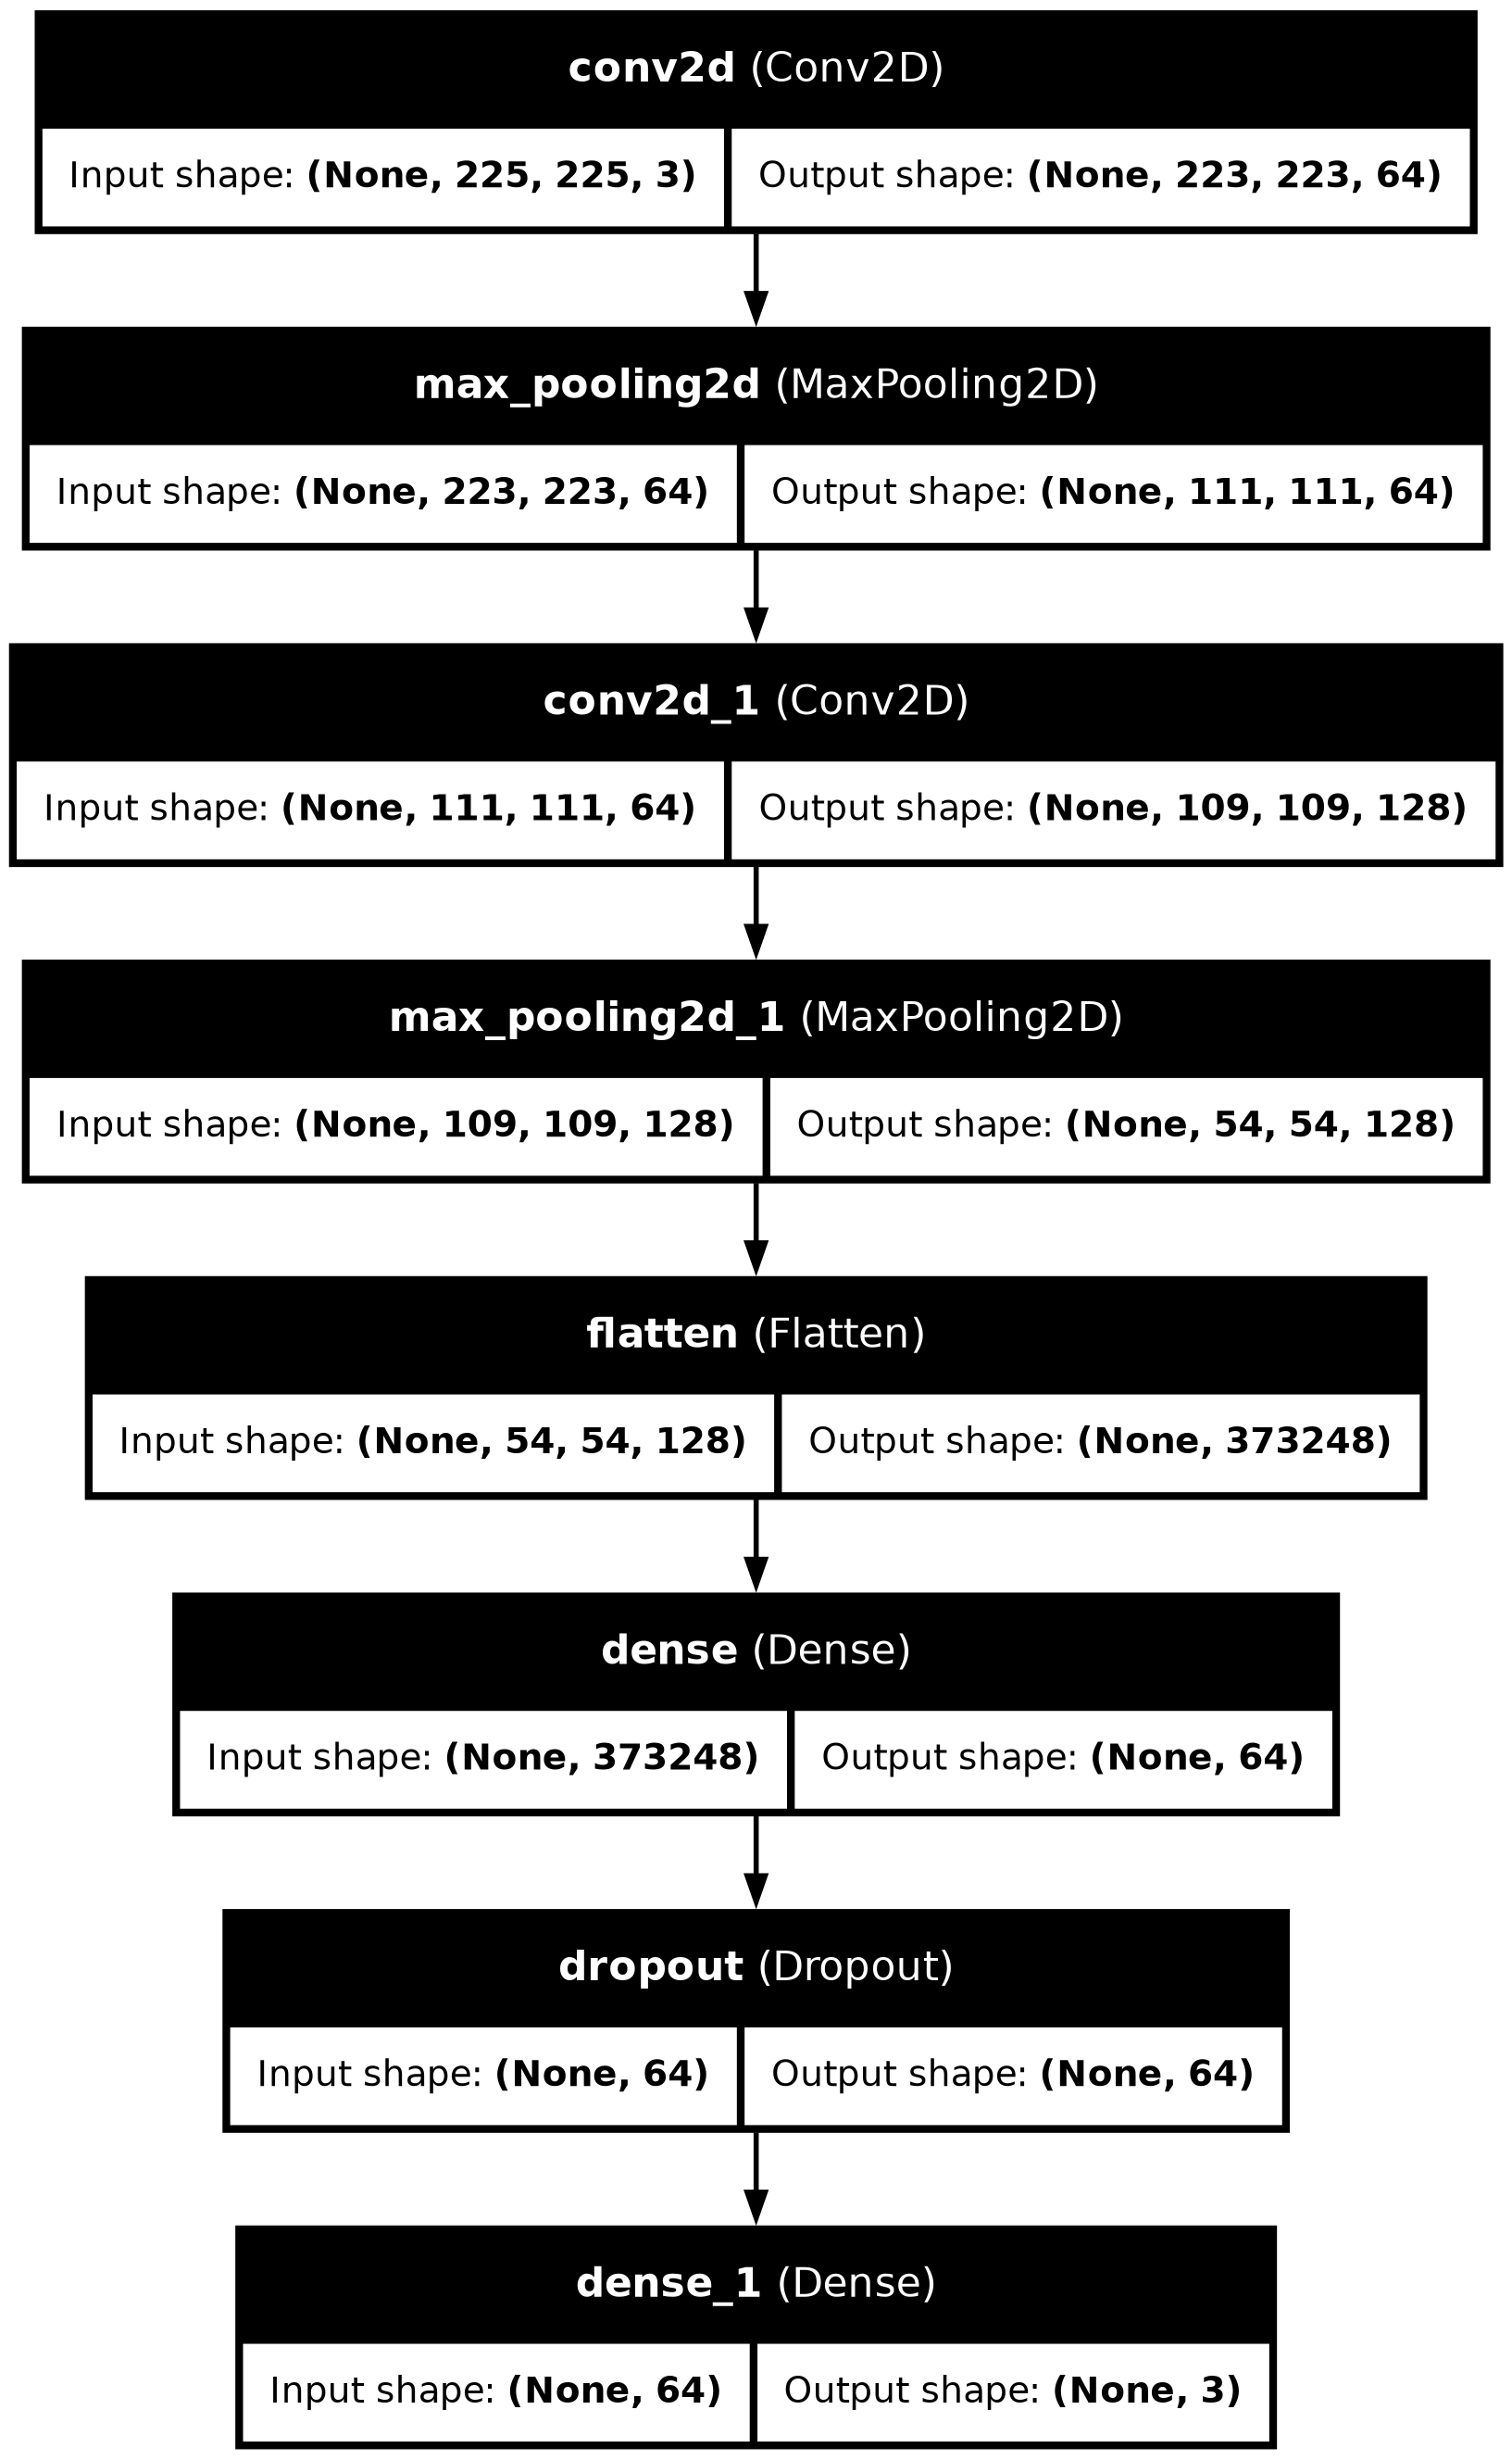

In [8]:
plot_model(model,show_layer_names=True,show_shapes=True)

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(train_set, epochs=9, batch_size=16, validation_data=test_set, callbacks=[early_stopping])

Epoch 1/9


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/42 ━━━━━━━━━━━━━━━━━━━━ 20:45 30s/step - accuracy: 0.2188 - loss: 1.1734

I0000 00:00:1720635202.226206     145 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


42/42 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.3636 - loss: 5.8302 - val_accuracy: 0.3400 - val_loss: 1.0972
Epoch 2/9
42/42 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.3443 - loss: 1.1087 - val_accuracy: 0.3333 - val_loss: 1.0971
Epoch 3/9
42/42 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.3785 - loss: 1.0982 - val_accuracy: 0.3333 - val_loss: 1.0972
Epoch 4/9
42/42 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.3536 - loss: 1.0984 - val_accuracy: 0.3333 - val_loss: 1.0972
Epoch 5/9
42/42 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.3534 - loss: 1.0983 - val_accuracy: 0.3333 - val_loss: 1.0972
